In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\TAHIMA\Pictures\New folder\feedback-prize-2021\train.csv")
df.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [3]:
df.shape

(144293, 8)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

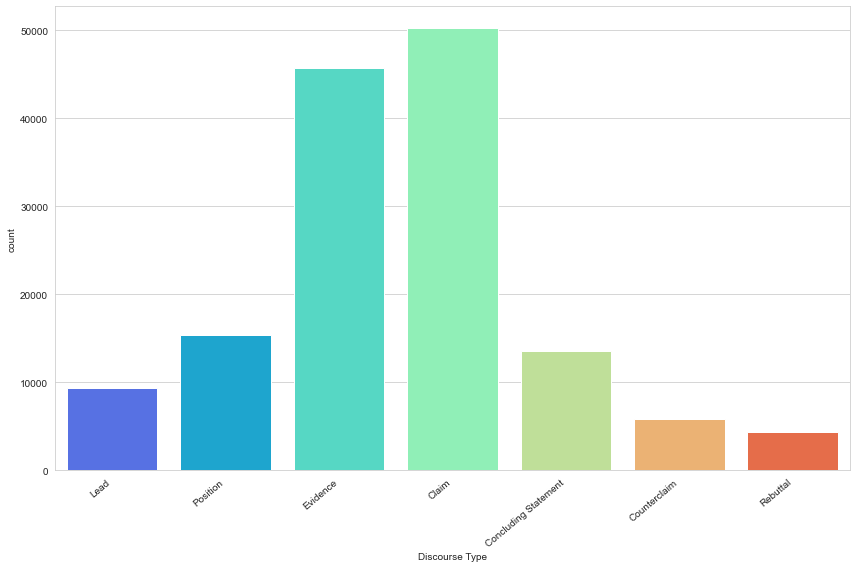

In [5]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
ax = sns.countplot(x='discourse_type',data = df,palette = 'rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Discourse Type')
plt.tight_layout()
plt.show()

In [6]:
train_texts = list(df.discourse_text)

In [7]:
train_labels = np.array(df.discourse_type)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [9]:
# n_gram range for tokenizing text
ngram_range = (1,2)

# Limiting features
top_k = 20000

# Whether text should be split into word or character n-grams.
token_mode = 'word'

# Document/corpus frequency below which a token will be discarded.
MIN_df = 2

# Arguments for tf-idf vectorizer.
kwargs = {
        'ngram_range': ngram_range, 
        'dtype': 'int32',
        'strip_accents': 'unicode',
        'decode_error': 'replace',
        'analyzer': token_mode,  # Split text into word tokens.
        'min_df': MIN_df,
}

vectorizer = TfidfVectorizer(**kwargs)

# Learn vocabulary from training texts and vectorize training texts.
x_train = vectorizer.fit_transform(train_texts)

# Select top 'k' of the vectorized features.
selector = SelectKBest(f_classif, k=min(top_k, x_train.shape[1]))
selector.fit(x_train, train_labels)
x_train = selector.transform(x_train).astype('float32')

C:\Users\TAHIMA\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [10]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(x_train, train_labels)

LinearSVC()

In [11]:
#Create dict with each testing essay's text and id
def create_test_list():
    total_list = []
    
    Test_Dict = r"C:\Users\TAHIMA\Pictures\New folder\feedback-prize-2021\test"
    for filename in os.listdir(Test_Dict):
        file_path = os.path.join(Test_Dict, filename)
        # checking if it is a file
        if os.path.isfile(file_path) and os.path.splitext(file_path)[1] == ".txt":
            with open(file_path) as f:
                    total_list.append({
                        'text' : f.read(), 
                        'id' : os.path.splitext(filename)[0]
                    })
    
    return total_list

In [12]:
import os
import nltk
test_texts =  create_test_list()

In [13]:
test_texts

[{'text': "During a group project, have you ever asked a group member about adding or replacing something? Or, when you were studying for a math test, did you ever ask your parents or sibling about different ways to tackle a certain problem? Asking for other's opinions is especially beneficial as it allows for an individual to receive a variety of different views towards a given topic. Likewise, being diverse and asking many people for their opinions allows one to understand how most people percieve something. This is especially important as knowing multiple opinions can allow someone to take those views into account and sway themseleves to the general audience. Knowing different people's opinion can be beneficial in a variety of situations.\n\nFirst and foremost, a great example about how knowing other's opinions is helpful is when someone is making the choice between smoking or refraining from smoking. A student can watch on a TV channel that smoking is bad, and can damage their inte

In [14]:
pred_dicts_list = []

for test_text in test_texts:
    
    total_word_count = 0
    
    tokenized_sentences = nltk.sent_tokenize(test_text["text"])
    
    x_test = vectorizer.transform(tokenized_sentences)
    x_test = selector.transform(x_test).astype('float32')
    preds = model.predict(x_test) #Returns list
    
    
    for i, pred in enumerate(preds):
        
        # Generate prediction strings for each predicted discourse
        tokenized_sentence = tokenized_sentences[i]
        
        if i == 0 or preds[i-1] != pred:
            prediction_string = ""
        
        for x in range(total_word_count, total_word_count + len(tokenized_sentence.split())):
            prediction_string += f"{x} "
        
        total_word_count += len(tokenized_sentence.split())
        
        try:
            if preds[i+1] == pred:
                continue
        except:
            pass
        
        pred_dicts_list.append({
            "id" : test_text["id"],
            "class" : pred, 
            "predictionstring" : prediction_string.strip()
        })

In [15]:
submit = pd.DataFrame(pred_dicts_list)

In [16]:
submit.to_csv(r"C:\Users\TAHIMA\Pictures\New folder\feedback-prize-2021\sample_submission.csv", index=False)

In [17]:
submit.head()

,id,class,predictionstring
0,0FB0700DAF44,Lead,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
1,0FB0700DAF44,Claim,41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 5...
2,0FB0700DAF44,Rebuttal,249 250 251 252 253 254 255 256 257 258 259 26...
3,0FB0700DAF44,Claim,262 263 264 265 266 267 268 269 270 271 272 27...
4,0FB0700DAF44,Evidence,283 284 285 286 287 288 289 290 291 292 293 29...
